## Lab: MNIST Autoencoder

You will now work on an autoencoder that works on the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). This will encode the inputs to lower resolution images. The decoder should then be able to generate the original input from this compressed representation.

In [3]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


## Imports

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

## Prepare the Dataset

You will load the MNIST data from TFDS into train and test sets. Let's first define a preprocessing function for normalizing and flattening the images. Since we'll be training an autoencoder, this will return `image, image` because the input will also be the target or label while training.


In [5]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [6]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

C:\Users\kumar\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                   

Dataset mnist downloaded and prepared to C:\Users\kumar\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


## Build the Model

You will now build a simple autoencoder to ingest the data. Like before, the encoder will compress the input and reconstructs it in the decoder output.

In [8]:
def simple_autoencoder(inputs):
  '''Builds the encoder and decoder using Dense layers.'''
  # START YOUR CODE HERE
  encoder = tf.keras.layers.Dense(units = 32, activation = "relu") (inputs)
  decoder = tf.keras.layers.Dense(units = 784, activation = "sigmoid") (encoder)
  # END YOUR CODE HERE
  return encoder, decoder

# set the input shape
inputs =  tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
encoder_output, decoder_output = simple_autoencoder(inputs)

# setup the encoder because you will visualize its output later
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

# setup the autoencoder
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

## Compile the Model

You will setup the model for training. You can use binary crossentropy to measure the loss between pixel values that range from 0 (black) to 1 (white).

In [9]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy')

## Train the Model

In [10]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.3197
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1495
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1234
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1108
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1034
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0990
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0965
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0953
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0948
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0942
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0940
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0939
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0936
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0936
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s

## Display sample results

You can now visualize the results. The utility functions below will help in plotting the encoded and decoded values.

In [11]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


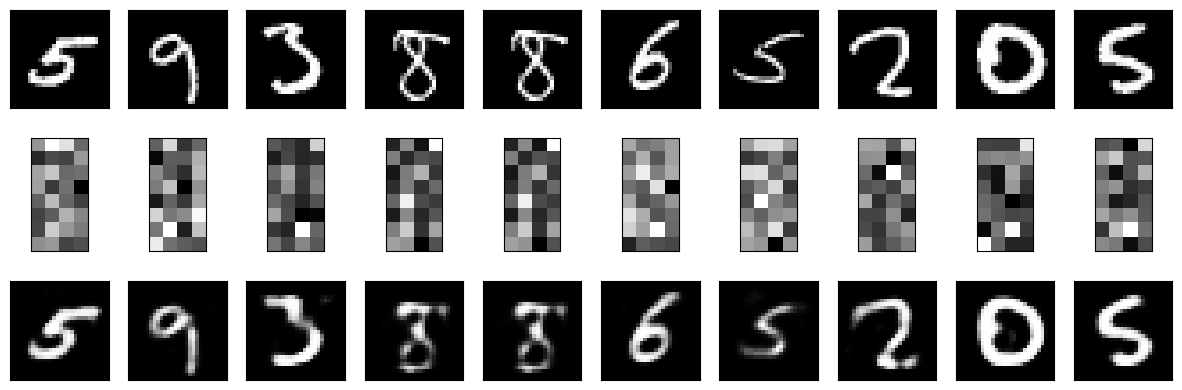

In [12]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])